In [4]:
%run flow_tools.py

In [5]:
df2 = pd.concat([pd.read_csv('20220812_CAR_Expression.csv', index_col=0),
                pd.read_csv('20220817_CAR_Expression.csv', index_col=0)],
               names=['Age','Index'],keys=['16 Days','21 Days']).reset_index()

/opt/homebrew/Caskroom/miniforge/base/envs/flow/lib/python3.9/site-packages/seaborn/categorical.py:3370: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/flow/lib/python3.9/site-packages/seaborn/categorical.py:3370: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


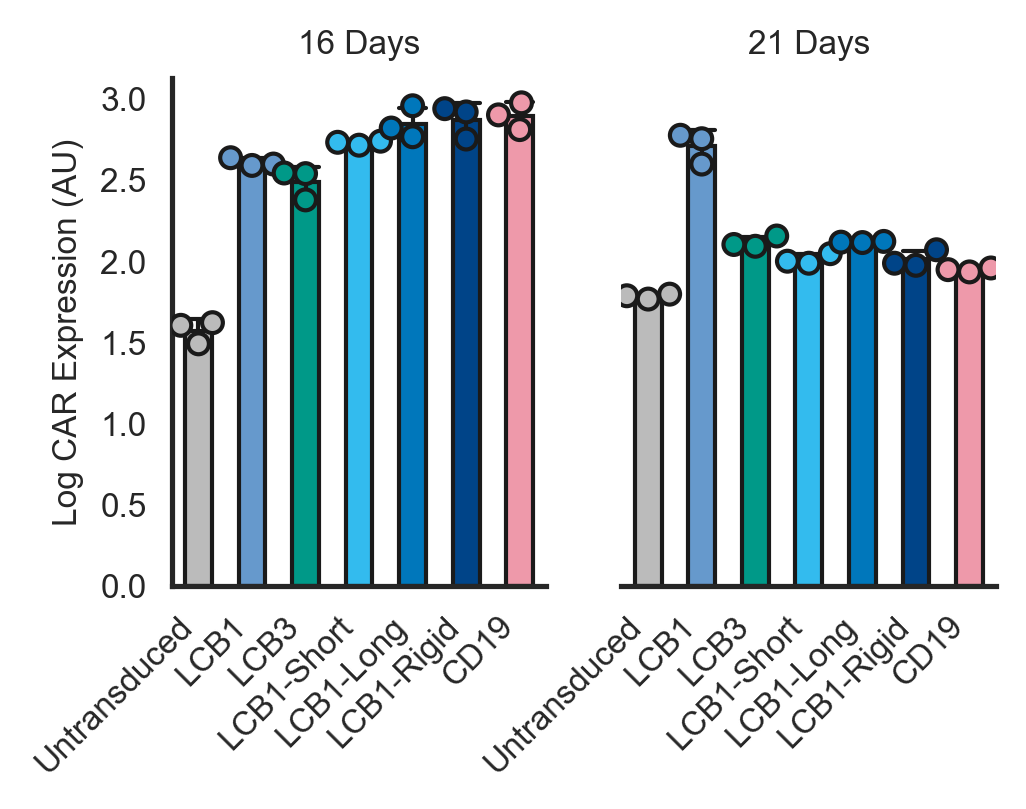

In [6]:
effectors = ['Untransduced','LCB1','LCB3','LCB1-Short','LCB1-Long', 'LCB1-Rigid', 'CD19']
ages = ['16 Days','21 Days']
colors = [grey, light_blue, teal, cyan, blue, dark_blue, light_red]
g = sns.catplot(data=df2, col='Age', x='Effector',y='logAPC-A',hue='Effector', kind='swarm',
                col_order=ages, order=effectors, hue_order=effectors, 
                edgecolor='k', linewidth=1, dodge=False, palette=colors)
g.map_dataframe(sns.barplot, x='Effector', y='logAPC-A',
                hue_order=effectors, errorbar='sd', hue='Effector',palette=colors,
                dodge=False, edgecolor='k', capsize=0.5, width=0.5, saturation=1,
                estimator='mean',
                err_kws={'linewidth': 1, 'color':'k'}, legend=True)
for ax in g.axes.flat[1:]:
    ax.spines[['left']].set_visible(False)
g.figure.set_size_inches(3.3,2)
g.figure.set_dpi(300)
g.set_xlabels('')
g.set_xticklabels(rotation=45, ha='right', size=SMALL_SIZE)
g.fig.subplots_adjust(wspace=0.2)
g.set_titles(col_template='{col_name}', size=SMALL_SIZE)
g.legend.remove()
#handles, labels = g.axes.flat[1].get_legend_handles_labels()
# order = [0,1,2,3,4,5,6]
# plt.legend([g.legend.legendHandles[idx] for idx in order],
#            effectors,
#            frameon=False, bbox_to_anchor=[1,1])
# g.axes.flat[1].legend(frameon=False, bbox_to_anchor=[1,1])
g.set_ylabels('Log CAR Expression (AU)', size=SMALL_SIZE)
plt.savefig(outputdir+'car_expression_comparison.pdf', bbox_inches='tight')